# パーセプトロン
パーセプトロンとは、複数の入力を一つの出力に変換するもの

<img width="200" src="./images/Perceptron.png" >

※ ◯をニューロンといい、xは入力信号、wは重みを表す
ニューロンでは送られた信号の総和が計算され、限界値を超えた時に1(発火)を出力する。

$$
y =
        \begin{cases}
            0 \quad (w_1x_1) + (w_2x_2) <= 0 \\
            1 \quad (w_1x_1) + (w_2x_2) > 0 \\
        \end{cases}
$$

## ANDゲートの真理値表

| $ x_1 $ | $ x_2 $ | y |
| -- | -- | -- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

In [16]:
# ANDゲートのパーセプトロン実装

def AND(param_x1, param_x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = param_x1 * w1 + param_x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

AND(0, 0) # 0
AND(1, 0) # 0
AND(0, 1) # 0
AND(1, 1) # 1

def NAND(param_x1, param_x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = param_x1 * w1 + param_x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

def OR(param_x1, param_x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = param_x1 * w1 + param_x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

0
1
1
1


# ステップ関数

入力が0を超えたら1を出力し、それ以外は0を出力する

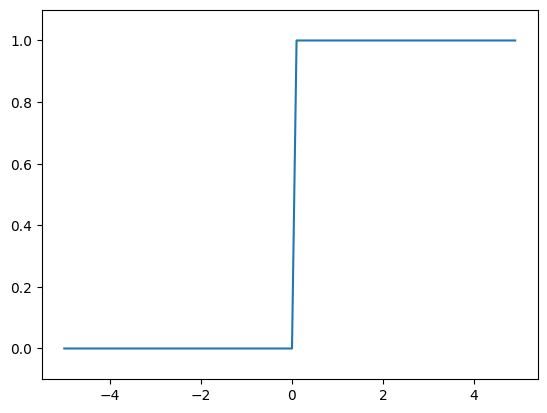

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int8)
    
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# シグモイド関数とステップ関数

ステップ関数と違って、シグモイド関数は滑らかな曲線を描く。
ニューラルネットワークではこの滑らかさが重要な役割を果たし、パーセプトロンでは実現できない様々な表現が可能になる。
共通している点としては、入力が小さいほど0に近く、入力が大きいほど1に近づくという非線形関数の性質を持つ。

活性化関数では線形関数（一直線のもの）を用いてはいけない。
線形関数を用いると、ニューラルネットワークの層を深くすることの意味がなくなってしまう。
つまり隠れ層（中間層）がないネットワークと同じになってしまう。
例えば、 $ h(x)=cx $ を活性化関数とし $ y(x)=h(h(h(x))) $ という3層のネットワークを考える。
同じことを $ y(x)=c^3x $ という1層のネットワークで表現することが出来てしまうため、線形関数を用いることは出来ない。

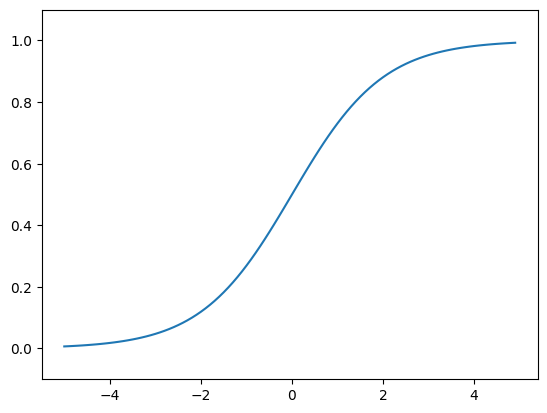

In [2]:
def sigmoid(param_x):
    return 1 / (1 + np.exp(-param_x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

# ReLU(Rectified Linear Unit)関数
古くから使われる活性化関数関数としてReLUもある。
これは入力が0を超えていればそのまま出力し、0以下なら0とするものである
$$
h(x) =
        \begin{cases}
            x \quad x \geqq 0 \\
            0 \quad x < 0 \\
        \end{cases}
$$

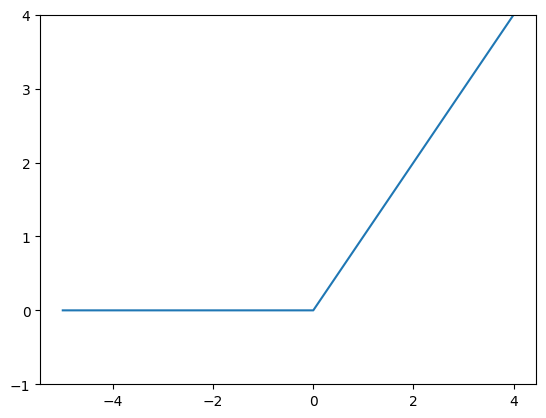

In [3]:
import numpy as np
def relu(param_x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 1)
y = relu(x)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.ylim(-1, 4) # y軸の範囲を指定
plt.show()

# ソフトマックス関数
ニューラルネットワークの出力層で用いる活性化関数で分類問題で使われる。
回帰問題では恒等関数（未加工で出力する関数）を用いられることが多い。

$$

y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)} \\
\\
= \frac{C\exp(a_k)}{C\sum_{i=1}^{n}\exp(a_i)}

$$

exp(x)は $ e^x $ を表す指数関数でeは[ネイピア数](https://ja.wikipedia.org/wiki/%E3%83%8D%E3%82%A4%E3%83%94%E3%82%A2%E6%95%B0) (2.7182...)である

In [4]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # prevent overflow
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

a = np.array([1010, 1000, 990])

np.exp(a) / np.sum(np.exp(a)) # calc softmax with overflow

y = softmax(a) # calc softmax without overflow

print(y)

np.sum(y)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/var/folders/c1/x6x0qdnj6x92nhzlw0v1y5wh0000gn/T/ipykernel_65280/2251101048.py:9: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # calc softmax with overflow
/var/folders/c1/x6x0qdnj6x92nhzlw0v1y5wh0000gn/T/ipykernel_65280/2251101048.py:9: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # calc softmax with overflow


1.0

# ソフトマックス関数の特徴

ソフトマックスの特徴として出力が0から1.0の実数になり総和が1になります。この性質のため出力を「確率」と解釈が出来る。
さらに各要素の大小関係はソフトマックス関数を適応してもしなくても変わらないため、ニューラルネットワークのクラス分類では一般的に出力の一番を起きいニューロンに相当するクラスだけを認識結果とする。
つまり他の要素はソフトマックス関数を適用する必要がなく、出力層のソフトマックス関数は省略することが出来る。

# MINISTデータセットを使った画像認識


In [5]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.path.abspath('__file__')), './deep-learning-from-scratch/dataset/'))
from mnist import load_mnist

(x_train, t_train), (x_test, t_test)  = load_mnist(flatten=True, normalize=False)

print(x_train.shape) # 訓練画像
print(t_train.shape) # テスト画像
print(x_test.shape) # 訓練画像ラベル
print(t_test.shape) # テスト画像ラベル

import numpy as np
from PIL import Image

def img_show(image):
    pil_img = Image.fromarray(np.uint8(image))
    pil_img.show()

img = x_train[0]
label = t_train[0]

print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


# 手書き画像の推論処理

MNISTデータセットに対して推論処理を行うネットワークを実装する。
ネットワーク入力層は784, 出力層を10ニューロンで構成する。
784=画像サイズの28×28、出力層10個=10クラス分類（数字の0~9）の意味である。

In [14]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    
    return x_test, t_test

def init_network():
    import pickle
    with open('deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, param_x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(param_x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']
# print('weight', W1, W2, W3)
# print('bias', b1, b2, b3)
# print('x', x[0])

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: ", str(float(accuracy_cnt) / len(x)))

Accuracy:  0.9352
